In [1]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cell_size = (1,1,0)

boundary_layer = [
    mp.PML(0.3, mp.X),
    mp.PML(0.3, mp.Y)
                  ]

In [5]:
resolution = 100
nfreq = 100

# lambda_min = 0.4
# lambda_max = 0.7

# fmin = 1 / lambda_max
# fmax = 1 / lambda_min

fcen = 1.75
df=3.3

In [15]:
source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=df),
    component=mp.Ex,
    center=source_center,
    size=mp.Vector3(0,0)
)]

In [16]:
sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

In [17]:
offset = 0.01
flux_size = 0.02
source_center = mp.Vector3(0,0,0)

box_power = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y
                ),
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y
                  )
)

<Axes: xlabel='X', ylabel='Y'>

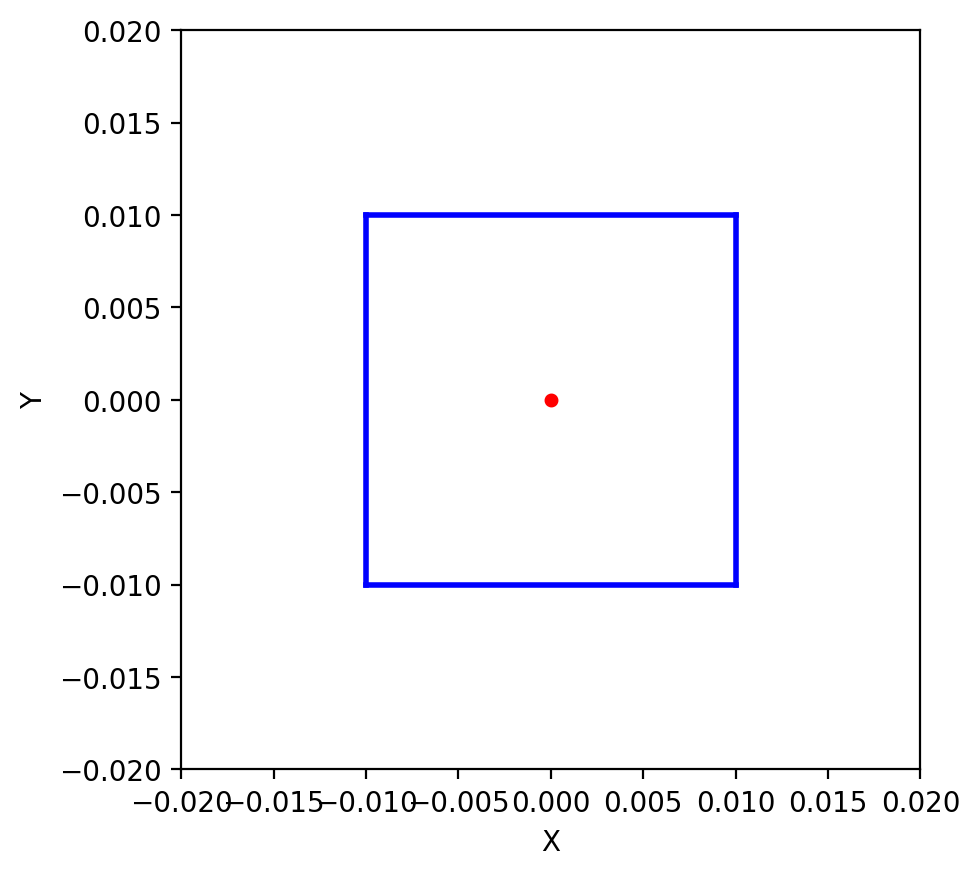

In [18]:
fig = plt.figure(dpi=200)
ax = plt.gca()

sim.plot2D(
    output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(0.04, 0.04, 0)),
    # eps_parameters={'cmap': 'coolwarm', 'alpha': 0.8},   # 투명도와 컬러맵
    ax=ax
)

-----------
Initializing structure...
time for choose_chunkdivision = 8.29697e-05 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 100
time for set_epsilon = 0.00553298 s
-----------
run 0 finished at t = 50.0 (10000 timesteps)
λ (μm)		net dipole power (W)
10.0000		-7.453147e-10
7.5000		-6.702914e-10
6.0000		-4.459080e-09
5.0000		1.621502e-08
4.2857		-1.494428e-09
3.7500		2.856827e-08
3.3333		6.494687e-08
3.0000		1.105822e-07
2.7273		2.797378e-07
2.5000		4.103758e-07
2.3077		7.442515e-07
2.1429		1.308815e-06
2.0000		2.060003e-06
1.8750		3.506701e-06
1.7647		5.505215e-06
1.6667		8.630713e-06
1.5789		1.350888e-05
1.5000		2.027602e-05
1.4286		3.059782e-05
1.3636		4.514613e-05
1.3043		6.552683e-05
1.2500		9.452120e-05
1.2000		1.335211e-04
1.1538		1.869382e-04
1.1111		2.584088e-04
1.0714		3.519946e-04
1.0345		4.752133e-04
1.0000		6.327708e-04
0.9677		8.334329e-04
0.9375		1.086336e-03
0.9091		1.398615e-03
0.8824		1.783321e-03
0.8571		2.248659e-03
0.8333		2.805233e-

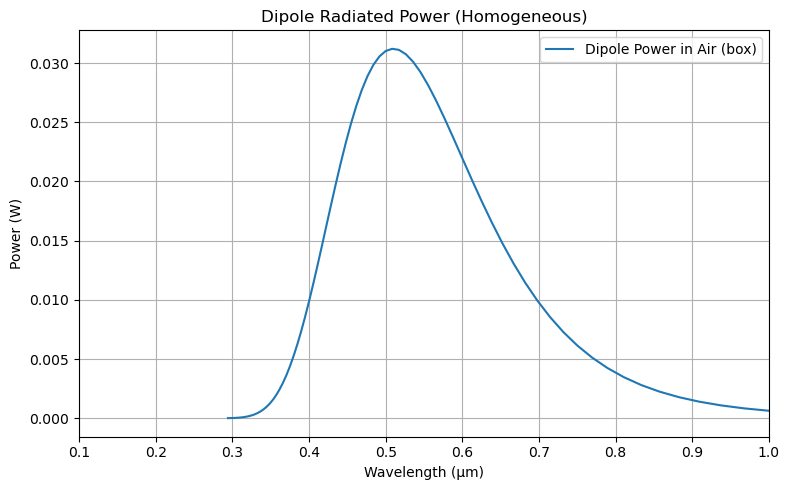

In [19]:
sim.init_sim()
# === 시뮬레이션 실행 ===
sim.run(until=50)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))

# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)

# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)

# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")

# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(wavelengths, net_power, label="Dipole Power in Air (box)", )
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power (W)")
plt.title("Dipole Radiated Power (Homogeneous)")
# plt.ylim([-3, 14])
plt.xlim([0.1,1])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


on time step 20000 (time=100), 0.0980901 s/step
run 2 finished at t = 150.0 (30000 timesteps)
0.28197359761386337
λ (μm)		net dipole power (W)
0.7000		1.854608e-05
0.6947		2.858822e-05
0.6896		4.326479e-05
0.6844		6.552179e-05
0.6794		9.776201e-05
0.6745		1.446847e-04
0.6696		2.121090e-04
0.6647		3.071085e-04
0.6600		4.416089e-04
0.6553		6.272660e-04
0.6507		8.847373e-04
0.6462		1.235435e-03
0.6417		1.711140e-03
0.6372		2.351193e-03
0.6329		3.202157e-03
0.6286		4.330196e-03
0.6243		5.804374e-03
0.6201		7.723810e-03
0.6160		1.019312e-02
0.6119		1.334608e-02
0.6079		1.733739e-02
0.6039		2.233526e-02
0.6000		2.855110e-02
0.5961		3.618965e-02
0.5923		4.550845e-02
0.5885		5.675248e-02
0.5848		7.019606e-02
0.5811		8.611897e-02
0.5775		1.047739e-01
0.5739		1.264442e-01
0.5704		1.513266e-01
0.5669		1.796423e-01
0.5634		2.115050e-01
0.5600		2.469884e-01
0.5566		2.860900e-01
0.5533		3.286641e-01
0.5500		3.745382e-01
0.5467		4.233214e-01
0.5435		4.746035e-01
0.5404		5.277729e-01
0.5372		5.821379e

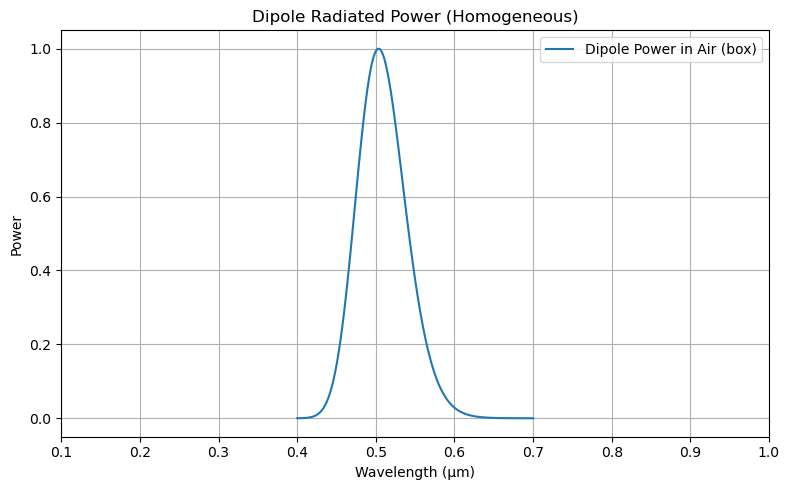

In [137]:
# === 시뮬레이션 실행 ===
sim.run(until=50)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))
# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)
print(max(net_power))
net_power = [x/max(net_power) for x in net_power]
# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)
# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")
# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(wavelengths, net_power, label="Dipole Power in Air (box)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power")
plt.title("Dipole Radiated Power (Homogeneous)")
plt.xlim([0.1, 1.0])
# plt.xticks(np.arange(0.1, 1.1, 0.1))
# plt.ylim([-0.01, 1.2])
# plt.yticks(np.arange(0, 1.2, 0.4))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
import csv

# 저장할 파일 경로
filename = "dipole_power.csv"

# CSV로 저장
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Wavelength (μm)", "Power (W)"])  # 헤더
    for wl, power in zip(wavelengths, net_power):
        writer.writerow([wl, power])

print(f"CSV 파일 저장 완료: {filename}")

CSV 파일 저장 완료: dipole_power.csv


-----------
Initializing structure...
time for choose_chunkdivision = 0.00117612 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 100
time for set_epsilon = 0.0128059 s
-----------
Meep progress: 156.275/200.0 = 78.1% done in 4.0s, 1.1s to go
on time step 31260 (time=156.3), 0.000127964 s/step
run 0 finished at t = 200.0 (40000 timesteps)
λ (μm)		net dipole power (W)
10.0000		-1.538803e-03
7.5000		-1.407346e-03
6.0000		-1.471398e-03
5.0000		-1.538247e-03
4.2857		-1.378748e-03
3.7500		-1.506432e-03
3.3333		-1.524585e-03
3.0000		-1.347012e-03
2.7273		-1.558640e-03
2.5000		-1.482619e-03
2.3077		-1.325523e-03
2.1429		-1.621246e-03
2.0000		-1.399248e-03
1.8750		-1.333060e-03
1.7647		-1.673168e-03
1.6667		-1.270665e-03
1.5789		-1.385523e-03
1.5000		-1.679897e-03
1.4286		-1.106700e-03
1.3636		-1.483459e-03
1.3043		-1.601129e-03
1.2500		-9.254432e-04
1.2000		-1.600984e-03
1.1538		-1.401780e-03
1.1111		-7.307179e-04
1.0714		-1.686163e-03
1.0345		-1.051526e-03
1.0000		

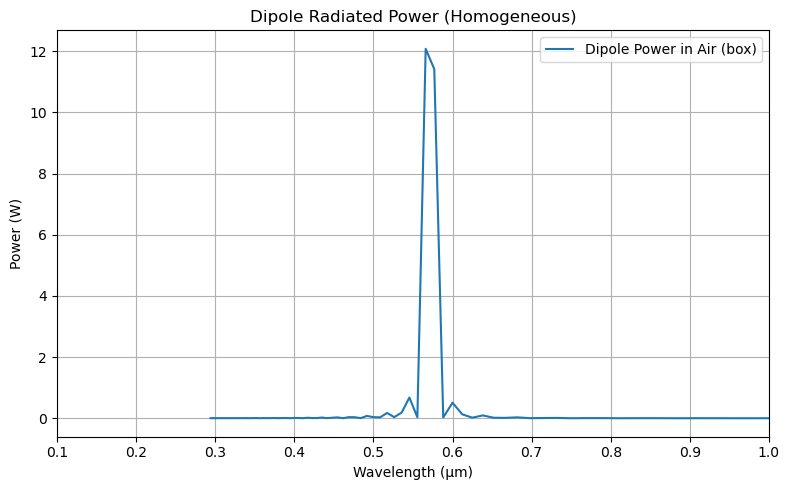

In [65]:
fcen = 1.75
df=3.3

source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=source_center,
    size=mp.Vector3(0,0)
)]

sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

offset = 0.01
flux_size = 0.02
source_center = mp.Vector3(0,0,0)

box_power = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y
                ),
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y
                  )
)

sim.init_sim()
# === 시뮬레이션 실행 ===
sim.run(until=200)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))

# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)

# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)

# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")

# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(wavelengths, net_power, label="Dipole Power in Air (box)", )
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power (W)")
plt.title("Dipole Radiated Power (Homogeneous)")
# plt.ylim([-3, 14])
plt.xlim([0.1,1])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
